# 🍲 [Day 11](https://adventofcode.com/2019/day/11)

In [64]:
def run_program(p, inputs, init_op=0, init_base=0):
    #Inputs are given in reverse order (pop)
    op = init_op
    relative_base = init_base
    last_diagnostic = []
    while p[op] != 99:
        codes = "%05d" % p[op]
        codes = [int(codes[0]), int(codes[1]), int(codes[2]), int(codes[3:])]
        # inputs
        if codes[-1] == 3:
            assert codes[1] == 0
            p[p[op + 1] + (relative_base if codes[2] == 2 else 0)] = inputs.pop()
            op += 2
        # unary ops
        elif codes[-1] in  [4, 9]:
            # read parameter
            assert codes[1] == 0
            param = p[op + 1]
            if (codes[2] % 2) == 0:
                try:
                    param = p[param + (relative_base if codes[2] == 2 else 0)]
                except IndexError:
                    param = 0
            # output
            if codes[-1] == 4:
                last_diagnostic.append(param)
                if len(last_diagnostic) == 2:
                    return last_diagnostic, 1, op + 2, relative_base
            # update relative base
            else:
                relative_base += param
            # next instr
            op += 2
        else:
            # read parameters in correct mode
            x, y = p[op + 1:op + 3]
            if (codes[2] % 2) == 0:
                try:
                    x = p[x + (relative_base if codes[2] == 2 else 0)]
                except IndexError:
                    x = 0
            if not (codes[1] % 2):
                try:
                    y = p[y + (relative_base if codes[1] == 2 else 0)]
                except IndexError:
                    y = 0
            # Read target and allocate more memory if needed
            target = p[op + 3] + (relative_base if codes[0] == 2 else 0)
            if target >= len(p): 
                p += [0] * (target - len(p) + 1)
            # addition and multiplication
            if codes[-1] in [1, 2]:
                p[target] = x + y if codes[-1] == 1 else x * y
                op += 4
            # Comparison result
            elif codes[-1] == 7:
                p[target] = int(x < y)
                op += 4
            elif codes[-1] == 8:
                p[target] = int(x == y)
                op += 4
            # Jump if eq
            elif (codes[-1] == 5 and x != 0) or (codes[-1] == 6 and x == 0):
                op = y  
            # Jump instruction that failed their test
            else:
                op += 3
    return last_diagnostic, 0, op, relative_base


def launch_painter_robot(program, part2=False):
    seen = {}
    op, base = 0, 0
    p = [x for x in program]
    coords = (0, 0)
    direction = (0, 1)
    outputs = [0, 0]
    if part2:
        seen[coords] = 1
    while 1:
        outputs, _, op, base = run_program(p, [seen.get(coords, 0)], init_op=op, init_base=base)
        if len(outputs) != 2: 
            break
        # paint
        seen[coords] = outputs[0]
        # rotate
        if outputs[1] == 0:
            direction = (- direction[1], direction[0])
        elif outputs[1] == 1:
            direction = (direction[1], - direction[0])
        coords = (coords[0] + direction[0], coords[1] + direction[1])
    return seen

In [66]:
with open("inputs/day11.txt", 'r') as f:
    inputs = list(map(int, f.read().split(',')))
    
print("The robot painted {} cells at least once".format(len(launch_painter_robot(inputs))))

The robot painted 2219 cells at least once


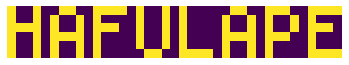

In [85]:
seen = launch_painter_robot(inputs, part2=True)

# Filter and plot
import numpy as np
from matplotlib import pyplot as plt
seen = {x: y for x, y in seen.items() if y}
xs, ys = zip(*seen.keys())
minx, maxx = min(xs), max(xs)
miny, maxy = min(ys), max(ys)
arr = np.zeros((maxx - minx + 1, maxy - miny + 1))
for x, y in seen:
    arr[x - minx, y - miny] = 1
plt.imshow(arr[:, ::-1].transpose())
plt.axis('off')
plt.show()